# **IMPORT LIBRARY**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,Input
# Klasifikasi, proses gambar, mengurangi ukuran gambar, mencegah Overfitting, Menguabh Matrik ke 1D, Menstabilkan Training, Menentukan bentk awal model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display, HTML
from google.colab import drive

ImportError: Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset_path = '/content/drive/MyDrive/SEMESTER 4/Kecerdasan Buatan/UAS/dataset-batik-main'

In [7]:
from PIL import Image

# Path folder dataset (ganti kalau mau dari training)
base_path = '/content/drive/MyDrive/SEMESTER 4/Kecerdasan Buatan/UAS/dataset-batik-main/dataset-batik-main/dataset-batik/training'

# Ambil semua subfolder label (misalnya: ['batik-bali', 'batik-megamendung', ...])
label_folders = os.listdir(base_path)

# Buat figure besar
plt.figure(figsize=(20, 8))

# Tampilkan 10 gambar dari 10 subfolder pertama
for i in range(10):
    folder_name = label_folders[i]
    folder_path = os.path.join(base_path, folder_name)
    image_file = os.listdir(folder_path)[0]  # ambil 1 gambar dari tiap folder
    image_path = os.path.join(folder_path, image_file)

    # Load dan tampilkan gambar
    img = Image.open(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(folder_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [8]:
from PIL import Image

# Path folder dataset (ganti kalau mau dari training)
base_path = '/content/drive/MyDrive/SEMESTER 4/Kecerdasan Buatan/UAS/dataset-batik-main/dataset-batik-main/dataset-batik/testing'

# Ambil semua subfolder label (misalnya: ['batik-bali', 'batik-megamendung', ...])
label_folders = os.listdir(base_path)

# Buat figure besar
plt.figure(figsize=(20, 8))

# Tampilkan 10 gambar dari 10 subfolder pertama
for i in range(10):
    folder_name = label_folders[i]
    folder_path = os.path.join(base_path, folder_name)
    image_file = os.listdir(folder_path)[0]  # ambil 1 gambar dari tiap folder
    image_path = os.path.join(folder_path, image_file)

    # Load dan tampilkan gambar
    img = Image.open(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(folder_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Brightness dan Shif**

In [9]:
# Augmentasi hanya untuk TRAINING

train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.5, 1.5],      # tingkat pencahayaan
    width_shift_range=0.2,            # geser horizontal
    height_shift_range=0.2            # geser vertikal
)

# Hanya normalisasi untuk TESTING
test_datagen = ImageDataGenerator(rescale=1./255)

# Path ke dataset (ganti sesuai lokasi kamu)
train_dir = '/content/drive/MyDrive/SEMESTER 4/Kecerdasan Buatan/UAS/dataset-batik-main/dataset-batik-main/dataset-batik/training'
test_dir = '/content/drive/MyDrive/SEMESTER 4/Kecerdasan Buatan/UAS/dataset-batik-main/dataset-batik-main/dataset-batik/testing'

# Mengambil data gambar dari folder untuk dilkukan training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Generator TEST
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # penting untuk evaluasi
)

Found 787 images belonging to 20 classes.
Found 194 images belonging to 20 classes.


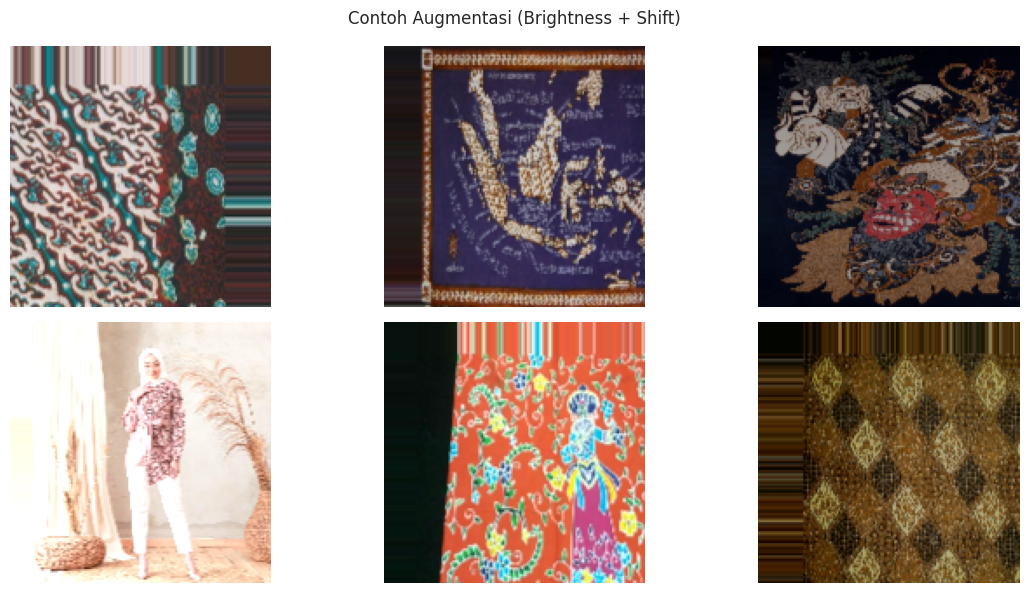

In [10]:
# Ambil 6 gambar hasil augmentasi

images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle('Contoh Augmentasi (Brightness + Shift)')
plt.tight_layout()
plt.show()

# **Rotation dan Flip**

In [11]:
# Data augmentation: rotasi dan flip

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,         # rotasi acak hingga 30 derajat
    horizontal_flip=True,      # flip horizontal (kiri ↔ kanan)
    vertical_flip=True         # flip vertikal (atas ↕ bawah)
)

# Untuk testing tetap hanya normalisasi (tanpa augmentasi)
test_datagen = ImageDataGenerator(rescale=1./255)

# Path dataset (ganti dengan punyamu)
train_dir = '/content/drive/MyDrive/SEMESTER 4/Kecerdasan Buatan/UAS/dataset-batik-main/dataset-batik-main/dataset-batik/training'
test_dir = '/content/drive/MyDrive/SEMESTER 4/Kecerdasan Buatan/UAS/dataset-batik-main/dataset-batik-main/dataset-batik/testing'

# Generator TRAIN
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Generator TEST
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 787 images belonging to 20 classes.
Found 194 images belonging to 20 classes.


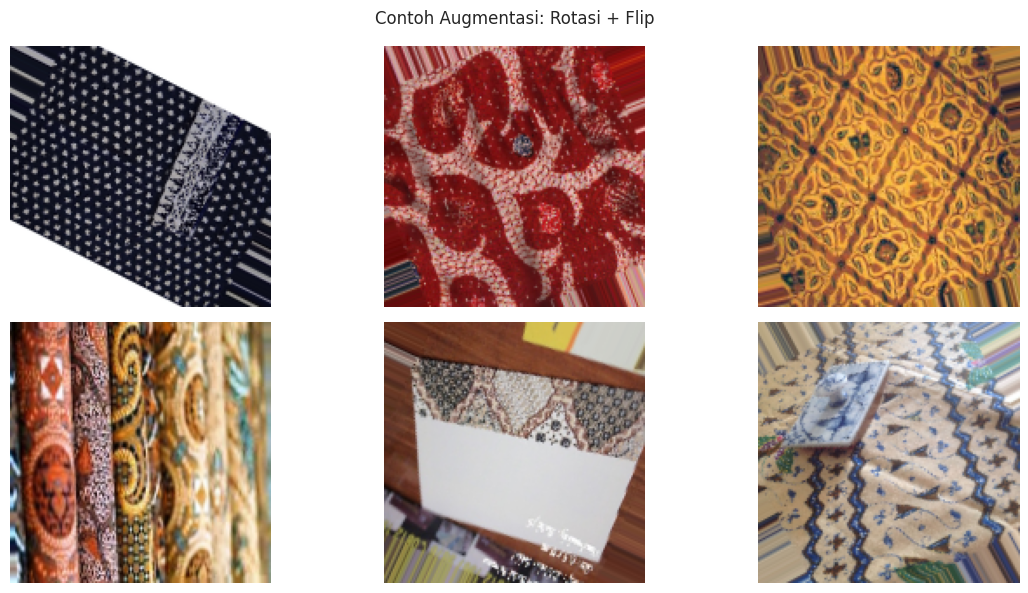

In [12]:
images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle("Contoh Augmentasi: Rotasi + Flip")
plt.tight_layout()
plt.show()

# **Zoom dan Shear**

In [13]:
# Data augmentation: zoom dan shear

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,            # zoom in/out hingga 20%
    shear_range=20             # shearing gambar hingga 20 derajat
)

# Untuk testing tetap hanya normalisasi
test_datagen = ImageDataGenerator(rescale=1./255)

# Path dataset (ganti dengan milikmu)
train_dir = '/content/drive/MyDrive/SEMESTER 4/Kecerdasan Buatan/UAS/dataset-batik-main/dataset-batik-main/dataset-batik/training'
test_dir = '/content/drive/MyDrive/SEMESTER 4/Kecerdasan Buatan/UAS/dataset-batik-main/dataset-batik-main/dataset-batik/testing'

# Generator TRAIN
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Generator TEST
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 787 images belonging to 20 classes.
Found 194 images belonging to 20 classes.


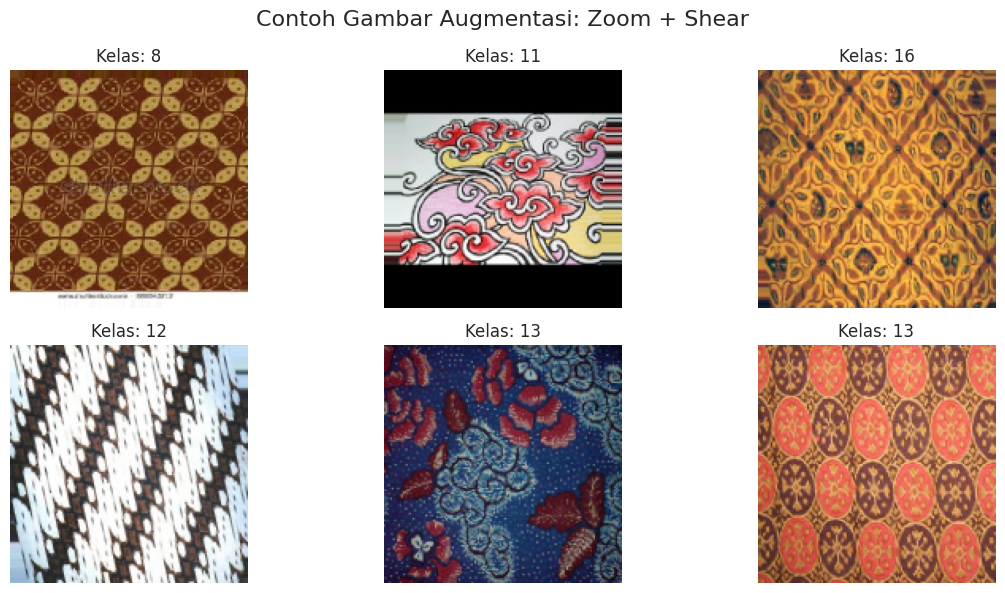

In [14]:
# Ambil satu batch gambar dari train_generator

images, labels = next(train_generator)

# Tampilkan 6 gambar pertama
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"Kelas: {np.argmax(labels[i])}")
plt.suptitle("Contoh Gambar Augmentasi: Zoom + Shear", fontsize=16)
plt.tight_layout()
plt.show()

# **Model CNN NIM GENAP 6 LAPISAN CONVOLUTION**

In [15]:
model = Sequential()

# Conv 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv 4
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv 5
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv 6
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#Proses Training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 264s 10s/step - accuracy: 0.0414 - loss: 3.0083 - val_accuracy: 0.0515 - val_loss: 2.9959
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.0484 - loss: 2.9960 - val_accuracy: 0.0412 - val_loss: 2.9850
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.0529 - loss: 2.9716 - val_accuracy: 0.0464 - val_loss: 3.0156
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.0963 - loss: 2.9378 - val_accuracy: 0.0825 - val_loss: 2.9935
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.0765 - loss: 2.9726 - val_accuracy: 0.0670 - val_loss: 3.1262
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.0768 - loss: 2.9327 - val_accuracy: 0.0670 - val_loss: 2.9963
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.0959 - loss: 2.8925 - val_accuracy: 0.0567 - val_loss: 2.9814
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.0741 - loss: 2.9495 - val_accuracy: 0.0722 - val_los

# **EVALUASI MODEL**

In [17]:
# Evaluasi Model
loss, acc = model.evaluate(test_generator)
print(f"Akurasi: {acc*100:.2f}%, Loss: {loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 831ms/step - accuracy: 0.2169 - loss: 4.6928
Akurasi: 20.10%, Loss: 4.4814


# **Tampilkan grafik akurasi dan loss.**

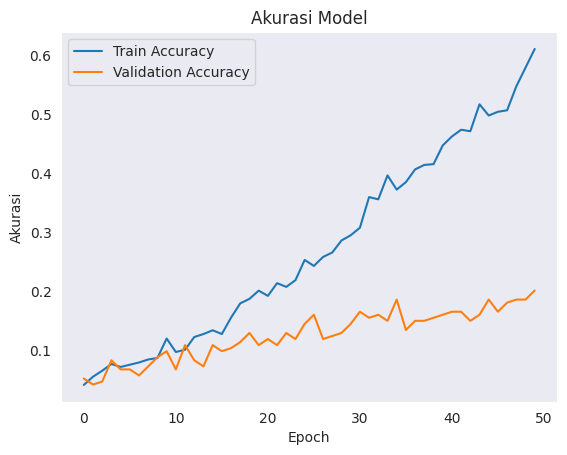

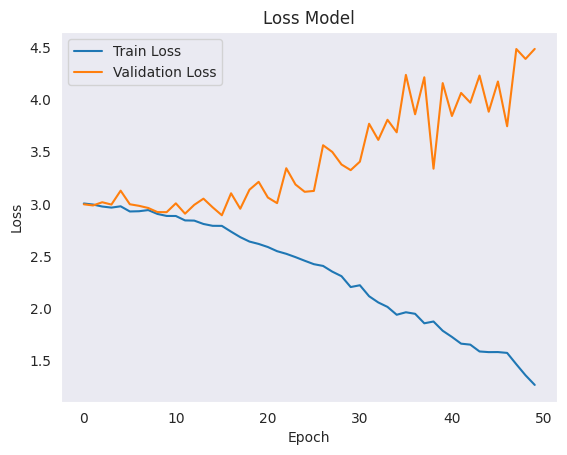

In [18]:
#Tampilkan grafik akurasi dan loss.
# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


## **Uji model anda dengan test set**

In [19]:
# Uji model anda dengan test set
loss, accuracy = model.evaluate(test_generator)
print(f"Akurasi pada test set: {accuracy*100:.2f}%")
print(f"Loss pada test set: {loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 860ms/step - accuracy: 0.2169 - loss: 4.6928
Akurasi pada test set: 20.10%
Loss pada test set: 4.4814


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


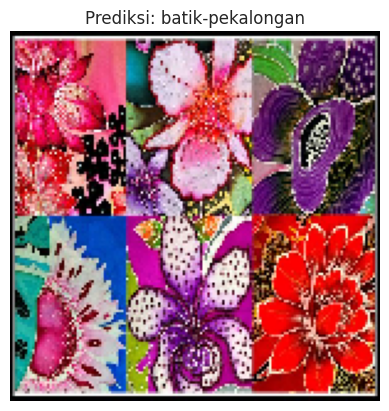

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


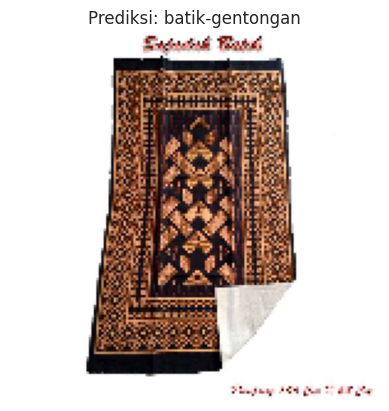

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


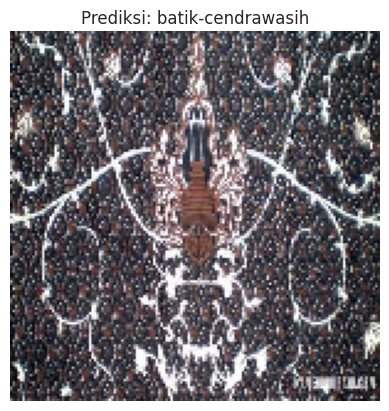

In [20]:
import random
from tensorflow.keras.preprocessing import image

# Lakukan prediksi pada 3 gambar batik, secara random, dari data yang ada pada dataset.

# Ambil path gambar dari test_dir (folder testing)
image_paths = []
for folder in os.listdir(test_dir):
    full_folder = os.path.join(test_dir, folder)
    for img_file in os.listdir(full_folder):
        image_paths.append(os.path.join(full_folder, img_file))

# Ambil 3 gambar random
random_images = random.sample(image_paths, 3)

# Lakukan prediksi & tampilkan
for img_path in random_images:
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_label = list(train_generator.class_indices.keys())[predicted_class]

    plt.imshow(img)
    plt.title(f"Prediksi: {class_label}")
    plt.axis('off')
    plt.show()

# **PREDIKSI MANUAL**

Saving 1.jpg to 1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


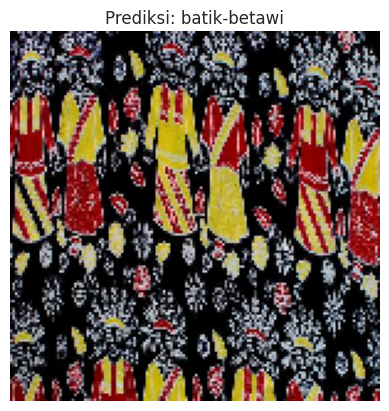

In [22]:
# Upload file dari lokal
from google.colab import files
uploaded = files.upload()

# Proses prediksi tiap gambar yang diupload
for file_name in uploaded.keys():
    # Load dan preprocessing gambar
    img = image.load_img(file_name, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_label = list(train_generator.class_indices.keys())[predicted_class]

    # Tampilkan hasil
    plt.imshow(img)
    plt.title(f"Prediksi: {class_label}")
    plt.axis('off')
    plt.show()